**Algorítmo de Aprendizado de Máquina**

Na a análise exploratória, lemos os arquivos "heart-train.csv" e "heart-test.csv", além dos dados do arquivo "covid.csv".


Ao lermos o arquivo "heart-train.csv" (o arquivo com os dados para a geração do modelo) observamos que:

1.   O arquivo em questão possui 613 observações e 16 variáveis.
2.   Cada variável (das 16) foi analisada para verificar as presenças ou não de "outliers" e "N/As".
1.   A variável paciente (identificação) está totalmente preenchida (em todas as observações e sem N/As).
2.   Da mesma forma, as variáveis Hospital, Idade e Sexo e TDP foram totalmente preenchidas também sem a ocorrência de N/As.
2.   Todas as outras variáveis com exceção da variável Diagnóstico, apresentaram N/As em número variado que veremos a seguir.

Para execução da Análise Univariada exploratória, tivemos de carregar uma série de Bibliotecas da Linguagem R, e apartir daí executar a Análise Univariada.


A partir da instalação das bibliotecas executamos os seguintes passos:



1.   Lemos a Base e a guardamos no Data Frame heart.train




In [7]:
heart.train <- read.csv2("/content/heart-train.csv")


Verificamos então, que as variáveis Paciente e  Hospital, apenas identificadoras do Paciente e do local dos exames, não serão utilizáveis como previsoras do modelo e desta forma as retiramos para análise no Data Frame novo a ser criado chamado de treino.

A Variável Dianostico foi transformada de seus valores originais de conteúdo de "P" para 1 e de "A" para 0 respectivamente. Essa necessidade se deve ao fato de no Modelo de Regressão Logística (o primeiro modelo escolhido) necessita ter valores númericos em sua variável alvo de regressão. Foi então assim gerada uma nova variável alvo chamada Diagnovo e eliminada a variável anterior Diagnostico.  

In [8]:
treino = heart.train[,-c(1,2)]
treino$Diagnovo = ifelse(treino$Diagnostico!="P",0,1)
treino = treino[,-c(14)]



Continuando a execução do código, visualizamos o Data Frame treino.


In [9]:
View(treino)

Idade,Sexo,TDP,PAR,CS,ASJ,ECG,FCM,AIE,DST,IST,NVP,Talassemia,Diagnovo
<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
60,F,1,150,240,0,0,171,0,"0,9",1,0,3,0
54,M,4,125,224,0,0,122,0,2,2,?,?,1
61,M,4,138,166,0,2,125,1,"3,6",2,1,3,1
60,M,3,115,0,?,0,143,0,"2,4",1,?,?,1
57,F,4,128,303,0,2,159,0,0,1,1,3,0
35,F,1,120,160,0,1,185,0,0,?,?,?,0
56,M,3,130,?,0,0,114,0,0,?,?,?,0
46,M,4,134,310,0,0,126,0,0,?,?,3,1
60,M,4,117,230,1,0,160,1,"1,4",1,2,7,1


Realizamos então a Regressão Logística no Modelo e o comando seguinte reduz variáveis com menor significância, verificamos um summary da predição e criamos uma nova variável no Data Frame treino chamada de prevcard2 (Propabilidade de Presenca de Doença Cardíaca)  

Separamos então em 10 grupos para verificação se o modelo convergiu. Essa verificação visual pretende identificar se a probabilidade de Ausência de Doenças Cardíacas decresce a medida que aumenta a Probabilidade da Presença de Doenças Cardíacas (valor este calculado pelo modelo - prevcard).


In [11]:
kpprescard=discretize(treino$prevcard, method = "frequency", breaks = 10)
tabpred = table(kpprescard, treino$Diagnovo);tabpred
prop.table(tabpred, 1)

View(treino)


                  
kpprescard          0  1
  [0.00736,0.0681) 58  4
  [0.0681,0.145)   56  4
  [0.145,0.278)    55  7
  [0.278,0.434)    34 27
  [0.434,0.657)    27 34
  [0.657,0.798)    14 47
  [0.798,0.882)     6 56
  [0.882,0.934)     5 56
  [0.934,0.966)     6 55
  [0.966,1]         2 60

                  
kpprescard                  0          1
  [0.00736,0.0681) 0.93548387 0.06451613
  [0.0681,0.145)   0.93333333 0.06666667
  [0.145,0.278)    0.88709677 0.11290323
  [0.278,0.434)    0.55737705 0.44262295
  [0.434,0.657)    0.44262295 0.55737705
  [0.657,0.798)    0.22950820 0.77049180
  [0.798,0.882)    0.09677419 0.90322581
  [0.882,0.934)    0.08196721 0.91803279
  [0.934,0.966)    0.09836066 0.90163934
  [0.966,1]        0.03225806 0.96774194

Idade,Sexo,TDP,PAR,CS,ASJ,ECG,FCM,AIE,DST,IST,NVP,Talassemia,Diagnovo,prevcard
<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
60,F,1,150,240,0,0,171,0,"0,9",1,0,3,0,0.007364563
54,M,4,125,224,0,0,122,0,2,2,?,?,1,0.798488867
61,M,4,138,166,0,2,125,1,"3,6",2,1,3,1,0.903241099
60,M,3,115,0,?,0,143,0,"2,4",1,?,?,1,0.717826597
57,F,4,128,303,0,2,159,0,0,1,1,3,0,0.212728793
35,F,1,120,160,0,1,185,0,0,?,?,?,0,0.024348143
56,M,3,130,?,0,0,114,0,0,?,?,?,0,0.263129351
46,M,4,134,310,0,0,126,0,0,?,?,3,1,0.396271923
60,M,4,117,230,1,0,160,1,"1,4",1,2,7,1,0.984327937


Além do Teste visual verificando os agrupamentos acima, fizemos o teste de Hosmer and Lemeshow, que indicou que o modelo convergiu, uma vez que não podemos eliminar a Hipótese nula (o p-value superou 5%).

In [12]:
#******** Teste do modelo usando o Hosmer and Lemeshow Test

hoslem.test(prevcard2$y, fitted(prevcard2), g=10)




	Hosmer and Lemeshow goodness of fit (GOF) test

data:  prevcard2$y, fitted(prevcard2)
X-squared = 12.722, df = 8, p-value = 0.1218


Outro teste realizado foi o Teste de Spiegelhalter, que por apresentar o p-value de 64,4% (muito acima dos 5%), a hipótese nula não pode ser rejeitada e então o modelo convergiu.


Dxy       C (ROC)            R2             D      D:Chi-sq 
 8.035741e-01  9.017871e-01  5.939045e-01  5.824768e-01  3.580583e+02 
          D:p             U      U:Chi-sq           U:p             Q 
           NA -3.262643e-03  8.526513e-13  1.000000e+00  5.857394e-01 
        Brier     Intercept         Slope          Emax           E90 
 1.194652e-01  3.008740e-10  1.000000e+00  3.311850e-02  2.594724e-02 
         Eavg           S:z           S:p 
 1.363383e-02 -4.626075e-01  6.436457e-01

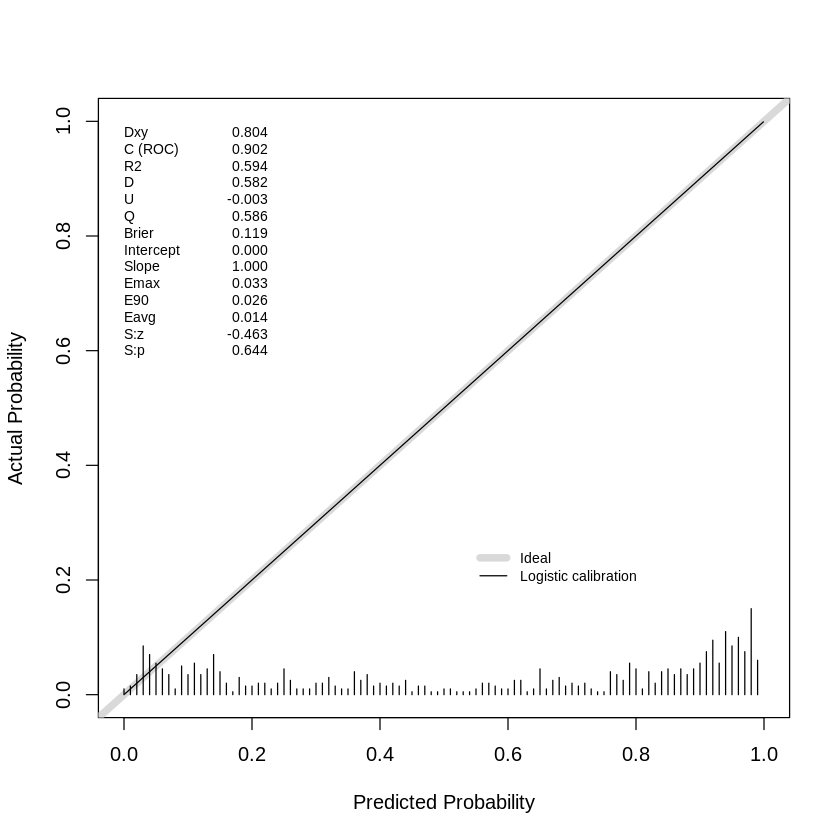

In [14]:
#******** Teste do modelo usando o Spiegelhalter

val.prob(treino$prevcard, treino$Diagnovo, smooth = F)

Montamos então uma Matriz de Confusão com ponto de corte de 53% ( o melhor que se apresentou entre 47% a 55%).


In [15]:
pc=0.53
KLASS=ifelse(treino$prevcard>pc, "aprova", "recusa")
table(KLASS, treino$Diagnovo)


        
KLASS      0   1
  aprova  48 299
  recusa 215  51

Calculamos o erro do modelo = (FN + FP) / NTO 
FN = Número de Falsos Negativos = 48
FP = Número de Falsos Positivos = 51
NTO = Número total de observações = 613


In [16]:
erro = (48+51)/613
print(erro)


[1] 0.1615008


Cálculo do Escore F1 médio 

EscF1med = 0.858 ou 85,8 %

In [17]:
#** Cálculo do Escore F1 médio

Precisao = 299/(299 + 51);Precisao
Revocacao = 299/(299 + 48);Revocacao
EscF1med = 2*Precisao*Revocacao/(Precisao+Revocacao);EscF1med



[1] 0.8542857

[1] 0.8616715

[1] 0.8579627

**Cálculos**

Precisao = VP/(VP+FP)

Especificidade = VN/(VN+FP)  

Sensibilidade = VP/(FN+VP) 

Acurácia = (VP+VN)/(VP+FP+VN+FN)


In [18]:
VP = 299
VN = 215
FP = 51
FN = 48
Precisao = VP / (VP + FP)
Especificidade = VN / (VN + FP)
Sensibilidade = VP / (FN + VP)
Acuracia = (VP + VN) / (VP + FP + VN + FN)
print(Precisao)
print(Especificidade)
print(Sensibilidade)
print(Acuracia)

[1] 0.8542857
[1] 0.8082707
[1] 0.8616715
[1] 0.8384992


**Curva ROC e AUC**


In [19]:
treino$PrevDiag=ifelse(treino$prevcard>0.53,1,0)
View(treino)


Idade,Sexo,TDP,PAR,CS,ASJ,ECG,FCM,AIE,DST,IST,NVP,Talassemia,Diagnovo,prevcard,PrevDiag
<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
60,F,1,150,240,0,0,171,0,"0,9",1,0,3,0,0.007364563,0
54,M,4,125,224,0,0,122,0,2,2,?,?,1,0.798488867,1
61,M,4,138,166,0,2,125,1,"3,6",2,1,3,1,0.903241099,1
60,M,3,115,0,?,0,143,0,"2,4",1,?,?,1,0.717826597,1
57,F,4,128,303,0,2,159,0,0,1,1,3,0,0.212728793,0
35,F,1,120,160,0,1,185,0,0,?,?,?,0,0.024348143,0
56,M,3,130,?,0,0,114,0,0,?,?,?,0,0.263129351,0
46,M,4,134,310,0,0,126,0,0,?,?,3,1,0.396271923,0
60,M,4,117,230,1,0,160,1,"1,4",1,2,7,1,0.984327937,1


In [22]:
novodf = subset(treino, select = c(PrevDiag,Diagnovo))

,PrevDiag,Diagnovo
,<dbl>,<dbl>
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0
6,0,0


Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.formula(formula = novodf$PrevDiag ~ novodf$Diagnovo, plot = TRUE,     print.auc = TRUE)

Data: novodf$Diagnovo in 266 controls (novodf$PrevDiag 0) < 347 cases (novodf$PrevDiag 1).
Area under the curve: 0.835

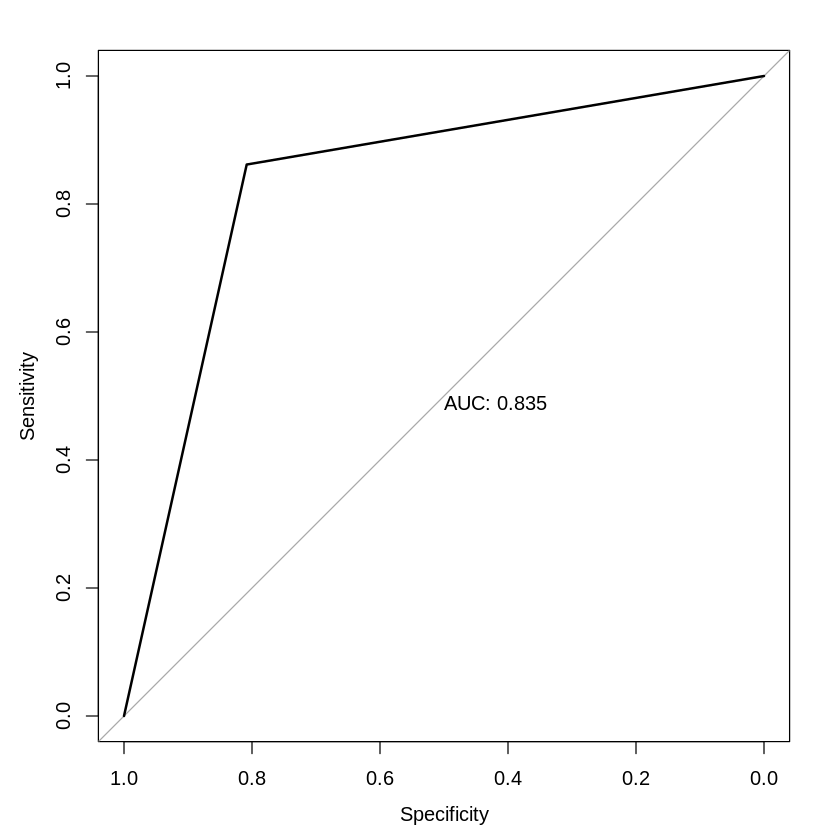

In [24]:
roc(novodf$PrevDiag ~ novodf$Diagnovo, plot = TRUE, print.auc=TRUE)

A partir de agora, lemos o nosso arquivo de teste e transformamos várias variáveis em factor, necessárias para a execução da previsão calculada pelo Modelo com o arquivo de treino.

In [13]:
#****** fazer a previsao no arquivo heart-test.csv

heart.test <- read_xlsx("/content/heart-test.xlsx")
View(heart.test)
heart.test$Hospital=as.factor(heart.test$Hospital)
heart.test$Sexo=as.factor(heart.test$Sexo)
heart.test$PAR=as.factor(heart.test$PAR)
heart.test$CS=as.factor(heart.test$CS)
heart.test$ASJ=as.factor(heart.test$ASJ)
heart.test$ECG=as.factor(heart.test$ECG)
heart.test$FCM=as.factor(heart.test$FCM)
heart.test$AIE=as.factor(heart.test$AIE)
heart.test$DST=as.factor(heart.test$DST)
heart.test$IST=as.factor(heart.test$IST)
heart.test$NVP=as.factor(heart.test$NVP)
heart.test$Talassemia=as.factor(heart.test$Talassemia)


Paciente,Hospital,Idade,Sexo,TDP,PAR,CS,ASJ,ECG,FCM,AIE,DST,IST,NVP,Talassemia
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
25,C,50,F,3,120,219,0,0,158,0,1.6,2,0,3
249,C,62,M,2,128,208,1,2,140,0,0,1,0,3
166,C,52,M,3,138,223,0,0,169,0,0,1,?,3
87,C,53,F,3,128,216,0,2,115,0,0,1,0,?
529,H,38,M,4,110,?,0,0,150,1,1,2,?,?
183,C,59,M,1,178,270,0,2,145,0,4.2,3,0,7
55,C,54,M,4,124,266,0,2,109,1,2.2000000000000002,2,1,7
163,C,58,F,4,100,248,0,2,122,0,1,2,0,3
616,S,46,M,4,115,0,0,0,113,1,1.5,2,?,7


Verificamos que o arquivo não mudou nada em seu conteúdo, apenas ficou de acordo com a estrutura do arquivo de treino para execução da predição.

In [14]:
summary(heart.test)

coracao.teste <- heart.test
summary(coracao.teste)
View(coracao.teste)


    Paciente     Hospital     Idade       Sexo         TDP             PAR     
 Min.   :  0.0   C:104    Min.   :31.00   F: 70   Min.   :1.000   120    : 40  
 1st Qu.:227.5   H: 92    1st Qu.:46.00   M:237   1st Qu.:2.000   130    : 35  
 Median :435.0   S: 41    Median :54.00           Median :4.000   140    : 34  
 Mean   :457.6   V: 70    Mean   :53.09           Mean   :3.212   110    : 23  
 3rd Qu.:687.5            3rd Qu.:59.00           3rd Qu.:4.000   ?      : 17  
 Max.   :917.0            Max.   :77.00           Max.   :4.000   150    : 17  
                                                                  (Other):141  
       CS      ASJ     ECG          FCM      AIE          DST      IST    
 0      : 57   ?: 30   0:185   ?      : 16   ?: 16   0      :124   ?: 94  
 ?      : 10   0:237   1: 61   140    : 16   0:177   1      : 28   1: 69  
 240    :  5   1: 40   2: 61   150    : 15   1:114   1.5    : 23   2:117  
 182    :  4                   130    : 10           2      

    Paciente     Hospital     Idade       Sexo         TDP             PAR     
 Min.   :  0.0   C:104    Min.   :31.00   F: 70   Min.   :1.000   120    : 40  
 1st Qu.:227.5   H: 92    1st Qu.:46.00   M:237   1st Qu.:2.000   130    : 35  
 Median :435.0   S: 41    Median :54.00           Median :4.000   140    : 34  
 Mean   :457.6   V: 70    Mean   :53.09           Mean   :3.212   110    : 23  
 3rd Qu.:687.5            3rd Qu.:59.00           3rd Qu.:4.000   ?      : 17  
 Max.   :917.0            Max.   :77.00           Max.   :4.000   150    : 17  
                                                                  (Other):141  
       CS      ASJ     ECG          FCM      AIE          DST      IST    
 0      : 57   ?: 30   0:185   ?      : 16   ?: 16   0      :124   ?: 94  
 ?      : 10   0:237   1: 61   140    : 16   0:177   1      : 28   1: 69  
 240    :  5   1: 40   2: 61   150    : 15   1:114   1.5    : 23   2:117  
 182    :  4                   130    : 10           2      

Paciente,Hospital,Idade,Sexo,TDP,PAR,CS,ASJ,ECG,FCM,AIE,DST,IST,NVP,Talassemia
<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
25,C,50,F,3,120,219,0,0,158,0,1.6,2,0,3
249,C,62,M,2,128,208,1,2,140,0,0,1,0,3
166,C,52,M,3,138,223,0,0,169,0,0,1,?,3
87,C,53,F,3,128,216,0,2,115,0,0,1,0,?
529,H,38,M,4,110,?,0,0,150,1,1,2,?,?
183,C,59,M,1,178,270,0,2,145,0,4.2,3,0,7
55,C,54,M,4,124,266,0,2,109,1,2.2000000000000002,2,1,7
163,C,58,F,4,100,248,0,2,122,0,1,2,0,3
616,S,46,M,4,115,0,0,0,113,1,1.5,2,?,7


Realizamos a predição do modelo no Data frame criado no passo anterior chamado de coracao.teste e nele inserimos a probabilidade da previsão da Presença de Doenças Cardíacas segundo o cálculo do modelo e usando o mesmo ponto de corte de 53% determinado como o melhor no arquivo anterior, gravamos a variável Dignostico com os valores P se a probabilidade calculada for maior que 53%, ou A, se a mesma não for. Com o Data Frame coracao.teste com essas variáveis acrescentadas, fizemos um subset com as variáveis Paciente e Diagnóstico e as gravamos no arquivo de resultado heart-results.csv

In [15]:
coracao.teste$prevcard=predict.glm(prevcard2, newdata=coracao.teste, type='response')
coracao.teste$Diagnostico=ifelse(coracao.teste$prevcard>0.53,"P","A")

coracao.teste2=subset(coracao.teste, select = c(Paciente,Diagnostico))

View(coracao.teste2)
write.csv2(coracao.teste2, file = "/content/heart-results.csv", row.names=FALSE)



Paciente,Diagnostico
<dbl>,<chr>
25,A
249,A
166,A
87,A
529,P
183,A
55,P
163,A
616,P


Assim, encerramos este modelo utilizando Regressão Logística.

O modelo obteve uma boa precisão de mais de 83% no seu arquivo teste.
 

Para a fase seguinte com o algoritmo de Escolha do Modelo utilizaremos Machine Learning com a finaidade de encontrarmos um melhor modelo. 